In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 12

## Exercise 1 
<hr>

In [4]:
class Perceptron:
    """
    A simple Rosenblatt Perceptron implementation.
    """

    def __init__(self, n_inputs, learning_rate=0.1):
        """
        Initialise the perceptron.
 
        Parameters:
        -----------
        n_inputs : int
            Number of input features
        learning_rate : float
            Learning rate (alpha) for weight updates

        """

        self.weights = np.random.uniform(-0.5, 0.5, size=n_inputs)
        self.bias = np.random.uniform(-0.5, 0.5)
        self.learning_rate = learning_rate

    def step_function(self, x):
        """
        Step activation function

        Returns 1 if x >= 0, else returns 0
        """
        
        if int(x >= 0):
            return 1
        
        else:
            return 0
        
    
    def predict(self, inputs):
        """
        Compute the perceptron output for given inputs.
        
        Parameters:
        -----------
        inputs : array-like
            Input values (x1, x2, ...)
        
        Returns:
        --------
        int : 0 or 1
        """

        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.step_function(weighted_sum)
    
    def train(self, X, y, epochs, verbose=True):
        """
        Train the perceptron using the perceptron learning rule.
        
        Parameters:
        -----------
        X : array-like, shape (n_samples, n_features)
        Training inputs
        y : array-like, shape (n_samples,)
        Target outputs (0 or 1)
        epochs : int
        Number of training epochs
        verbose : bool
        If True, print weights after each epoch
        
        Returns:
        --------
        list : History of (weights, bias) tuples for each epoch
        """
        
        history = []
    
        # Store initial weights
        history.append((self.weights.copy(), self.bias))
    
        for epoch in range(epochs):
            total_error = 0
    
            for i in range(len(X)):
                # Get prediction
                prediction = self.predict(X[i])
    
                # Calculate error
                error = y[i] - prediction
                total_error += abs(error)
    
                # Update weights and bias
                self.weights += self.learning_rate * error * X[i]
                self.bias += self.learning_rate * error
    
            # Store weights after this epoch
            history.append((self.weights.copy(), self.bias))
        
            if verbose:
                print(f"Epoch {epoch + 1}: weights = {self.weights}, self.bias = {self.bias:.4f}, errors = {total_error}")
            
            # Early stopping if no errors
            if total_error == 0:
                if verbose:
                    print(f"Converged after {epoch + 1} epochs!")
                break
        
        return history


## Exercise 2
<hr>

In [5]:
# All input combinations
X_and = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

y_and = np.array([0, 0, 0, 1])

print("AND Training Data:")
print("X:")
print(X_and)
print("y:", y_and)

AND Training Data:
X:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
y: [0 0 0 1]


In [6]:
# Create perceptron
perceptron_and = Perceptron(n_inputs=2, learning_rate=0.1)

print("Initial weights:", perceptron_and.weights)
print("Initial bias:", perceptron_and.bias)
print("\nTraining...\n")

# Train (store the history for later visualisation)
history_and = perceptron_and.train(X_and, y_and, epochs=10)

# Test on all inputs
print("\nTesting AND perceptron:")
print("-" * 40)
all_correct = True

for i in range(len(X_and)):
    prediction = perceptron_and.predict(X_and[i])
    correct = "✓" if prediction == y_and[i] else "✗"
    
    if prediction != y_and[i]:
        all_correct = False
    
    print(f"Input: {X_and[i]} -> Predicted: {prediction}, Expected: {y_and[i]} {correct}")

print("-" * 40)
print(f"All predictions correct: {all_correct}")

Initial weights: [-0.12545988  0.45071431]
Initial bias: 0.2319939418114051

Training...

Epoch 1: weights = [-0.12545988  0.35071431], self.bias = 0.0320, errors = 2
Epoch 2: weights = [-0.02545988  0.35071431], self.bias = -0.0680, errors = 3
Epoch 3: weights = [-0.02545988  0.25071431], self.bias = -0.1680, errors = 1
Epoch 4: weights = [0.07454012 0.25071431], self.bias = -0.1680, errors = 2
Epoch 5: weights = [0.17454012 0.25071431], self.bias = -0.1680, errors = 2
Epoch 6: weights = [0.17454012 0.15071431], self.bias = -0.2680, errors = 1
Epoch 7: weights = [0.17454012 0.15071431], self.bias = -0.2680, errors = 0
Converged after 7 epochs!

Testing AND perceptron:
----------------------------------------
Input: [0 0] -> Predicted: 0, Expected: 0 ✓
Input: [0 1] -> Predicted: 0, Expected: 0 ✓
Input: [1 0] -> Predicted: 0, Expected: 0 ✓
Input: [1 1] -> Predicted: 1, Expected: 1 ✓
----------------------------------------
All predictions correct: True


In [7]:
# Plotting function
def plot_decision_boundary(X, y, weights, bias, title="Decision Boundary", ax=None):
    """
    Plot data points and decision boundary.
    Parameters:
    -----------
    X : array-like, shape (n_samples, 2)
        Input data points
    y : array-like, shape (n_samples,)
        Labels (0 or 1)
    weights : array-like, shape (2,)
        Perceptron weights [w1, w2]
    bias : float
        Perceptron bias
    title : str
        Plot title
    ax : matplotlib axis (optional)
        Axis to plot on. If None, creates new figure.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))
    
    # Plot points
    for i in range(len(X)):
        if y[i] == 0:
            ax.scatter(X[i, 0], X[i, 1], c='red', marker='o', s=200,
                        edgecolors='black', linewidths=2, label='y=0' if i == 0 else '')

        else:
            ax.scatter(X[i, 0], X[i, 1], c='green', marker='s', s=200,
                        edgecolors='black', linewidths=2, label='y=1' if i == 3 else '')

    # Plot decision boundary
    # Line: w1*x1 + w2*x2 + b = 0
    # => x2 = -(w1/w2)*x1 - b/w2
    
    x1_range = np.linspace(-0.5, 1.5, 100)
    
    if abs(weights[1]) > 1e-10: # Avoid division by zero
        x2_boundary = -(weights[0] / weights[1]) * x1_range - (bias / weights[1])
        ax.plot(x1_range, x2_boundary, 'b-', linewidth=2, label='Decision boundary')

    else:
        # Vertical line case
        if abs(weights[0]) > 1e-10:
            x1_boundary = -bias / weights[0]
            ax.axvline(x=x1_boundary, color='b', linewidth=2, label='Decision boundary')

    # Formatting
    ax.set_xlim(-0.5, 1.5)
    ax.set_ylim(-0.5, 1.5)
    ax.set_xlabel('$x_1$', fontsize=14)
    ax.set_ylabel('$x_2$', fontsize=14)
    ax.set_title(title, fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.legend(loc='upper left')
    ax.set_aspect('equal')
    
    return ax

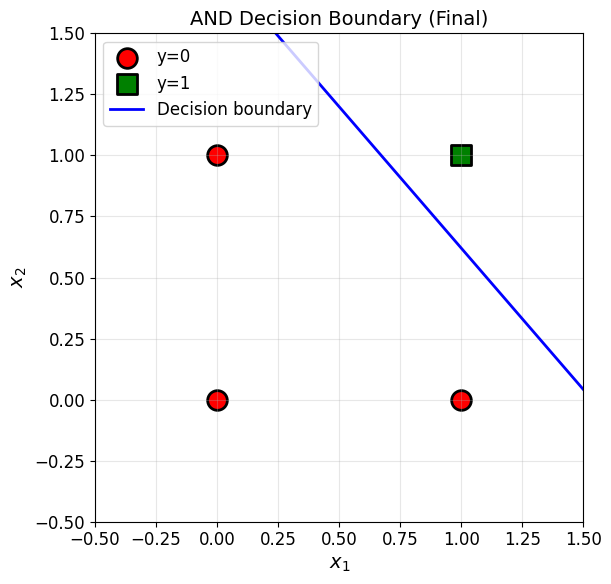

In [8]:
# Test the plotting function with the trained AND perceptron
plot_decision_boundary(X_and, y_and, perceptron_and.weights, perceptron_and.bias,
"AND Decision Boundary (Final)")
plt.tight_layout()
plt.show()